In [56]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as ds

MNIST = ds.load_digits()
xdata = MNIST.data.astype(np.float32)
tdata = MNIST.target.astype(np.int32)
D,N=xdata.shape
print(D,N)

1797 64


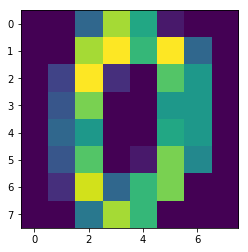

In [57]:
plt.imshow(xdata[0,:].reshape(8,8))
plt.show()

In [58]:
print(tdata)

[0 1 2 ... 8 9 8]


In [59]:
def data_divide(Dtrain,D,xdata,tdata):
    index = np.random.permutation(range(D))
    xtrain = xdata[index[0:Dtrain],:]
    ttrain = tdata[index[0:Dtrain]]
    xtest = xdata[index[Dtrain:D],:]
    ttest = tdata[index[Dtrain:D]]
    return xtrain,xtest,ttrain,ttest
Dtrain = D//2
xtrain,xtest,ttrain,ttest = data_divide(Dtrain,D,xdata,tdata)

In [60]:
import chainer.optimizers as Opt
import chainer.functions as F
import chainer.links as L
from chainer import Variable,Chain,config

In [61]:
C = tdata.max()+1
NN = Chain(l1 = L.Linear(N,20),l2=L.Linear(20,C))

In [62]:
def model(x):
    h = NN.l1(x)
    h = F.relu(h)
    y = NN.l2(h)
    return y

In [63]:
optNN = Opt.MomentumSGD()
optNN.setup(NN)

In [64]:
train_loss=[]
train_acc=[]
test_loss=[]
test_acc=[]

In [65]:
T=200
for time in range(T):
    config.train = True
    optNN.target.zerograds()
    ytrain = model(xtrain)
    loss_train = F.softmax_cross_entropy(ytrain,ttrain)
    acc_train = F.accuracy(ytrain,ttrain)
    loss_train.backward()
    optNN.update()
    
    config.train=False
    ytest = model(xtest)
    loss_test = F.softmax_cross_entropy(ytest,ttest)
    acc_test = F.accuracy(ytest,ttest)
    train_loss.append(loss_train.data)
    test_loss.append(loss_test.data)
    train_acc.append(acc_train.data)
    test_acc.append(acc_test.data)

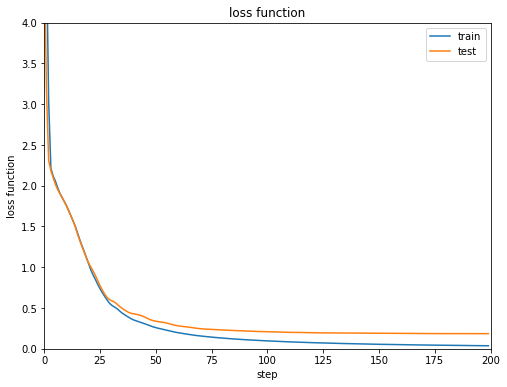

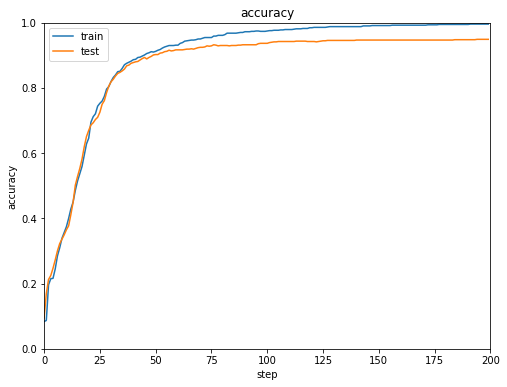

In [66]:
def plot_result2(result1,result2,title,xlabel,ylabel,ymin=0.0,ymax=1.0):
    Tall = len(result1)
    plt.figure(figsize=(8,6))
    plt.plot(range(Tall),result1,label='train')
    plt.plot(range(Tall),result2,label='test')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xlim([0,Tall])
    plt.ylim([ymin,ymax])
    plt.legend()
    plt.show()

plot_result2(train_loss,test_loss,'loss function','step','loss function',0.0,4.0)
plot_result2(train_acc,test_acc,'accuracy','step','accuracy')



In [36]:
import chainer.datasets as ds
train,test = ds.get_mnist()

60000 784


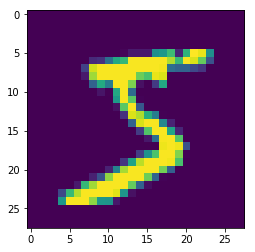

In [37]:
import chainer.dataset.convert as con
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as ds
import chainer.optimizers as Opt
import chainer.functions as F
import chainer.links as L
from chainer import Variable,Chain,config
xtrain,ttrain=con.concat_examples(train)
xtest,ttest = con.concat_examples(test)
Dtrain,N = xtrain.shape
print(Dtrain,N)
plt.imshow(xtrain[0,:].reshape(28,28))
plt.show()

In [38]:
C=ttrain.max()+1
NN=Chain(l1=L.Linear(N,400),l2=L.Linear(400,C),bnorm1=L.BatchNormalization(400))

def model(x):
    h=NN.l1(x)
    h=F.relu(h)
    h=NN.bnorm1(h)
    y = NN.l2(h)
    return y

In [39]:
def learning_classification(model,optNN,data,result,T=50):
    for time in range(T):
        config.train = True
        optNN.target.zerograds()
        ytrain=model(data[0])
        loss_train = F.softmax_cross_entropy(ytrain,data[2])
        acc_train=F.accuracy(ytrain,data[2])
        loss_train.backward()
        optNN.update()
        
        config.train=False
        ytest=model(data[1])
        loss_test=F.softmax_cross_entropy(ytest,data[3])
        acc_test=F.accuracy(ytest,data[3])
        result[0].append(loss_train.data)
        result[1].append(loss_test.data)
        result[2].append(acc_train.data)
        result[3].append(acc_test.data)

In [40]:
optNN = Opt.MomentumSGD()
optNN.setup(NN)

train_loss=[]
train_acc=[]
test_loss=[]
test_acc=[]
data=[xtrain,xtest,ttrain,ttest]
result=[train_loss,test_loss,train_acc,test_acc]

In [41]:
learning_classification(model,optNN,data,result)

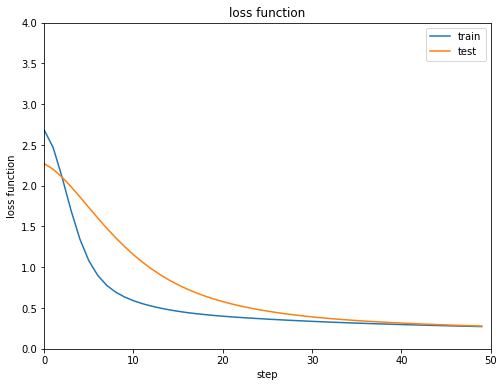

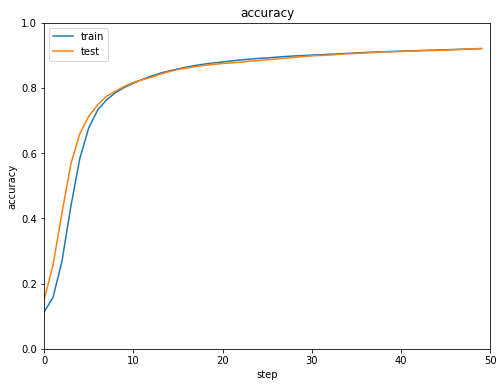

In [42]:
plot_result2(result[0],result[1],'loss function','step','loss function',0.0,4.0)
plot_result2(result[2],result[3],'accuracy','step','accuracy')

In [ ]:
from chainer import cuda
gpu_device=0
cuda.get_device(gpu_device).use()
NN.to_gpu()
data=cuda.to_gpu([xtrain,xtest,ttrain,ttest],gpu_device)
optNN = Opt.MomentumSGD()
optNN.setup(NN)
train_loss=[]
train_acc=[]
test_loss=[]
test_acc=[]
data=[xtrain,xtest,ttrain,ttest]
result=[train_loss,test_loss,train_acc,test_acc]
learning_classification(model,optNN,data,result)

In [ ]:
def learning_classification(model,optNN,data,result,T=10)
    for time in range(T):
        config.train=True
        optNN.target.cleargrads()
        ytrain=model(data[0])
        loss_train=F.softmax_cross_entropy(ytrain,data[2])
        acc_train=F.accuracy(ytrain,data[2])
        loss_train.backward()
        optNN.update()
        
        config.train=False
        ytest=model(data[1])
        loss_test=F.softmax_cross_entropy(ytest,data[3])
        acc_test=F.accuracy(ytest,data[3])
        result[0].append(cuda.to_cpu(loss_train.data))
        result[1].append(cuda.to_cpu(loss_test.data))
        result[2].append(cuda.to_cpu(acc_train.data))
        result[3].append(cuda.to_cpu(acc_test.data))
        

In [ ]:
plot_result2(result[0],result[1],'loss function','step','loss function',0.0,4.0)
plot_result2(result[2],result[3],'accuracy','step','accuracy')